<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Satellite Image Data <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: Satellite Image from WIFIRE Project</p>


WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library.


In [84]:
pip install imageio

distutils: /usr/local/include/python3.10/UNKNOWN
sysconfig: /usr/include/python3.10/UNKNOWN
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install scikit-image

distutils: /usr/local/include/python3.10/UNKNOWN
sysconfig: /usr/include/python3.10/UNKNOWN
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading the libraries we need: numpy, scipy, matplotlib</p>

In [86]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>
Lets choose a WIFIRE satellite image file as an ndarray and display its type.


In [114]:
from skimage import data

photo_data = imageio.v2.imread('./passport-photo.jpg')

# Note: In the video, this is mentioned as an ndarray. Don't worry about the type for now, it should
# still work as usual.
type(photo_data)

numpy.ndarray

Let's see what is in this image. 

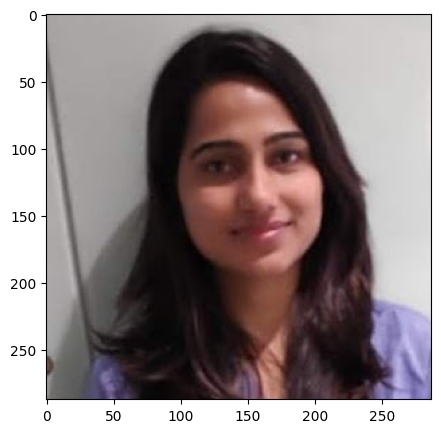

In [89]:
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

In [90]:
photo_data.shape

#print(photo_data)

(287, 287, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [91]:
photo_data.size

247107

In [92]:
photo_data.min(), photo_data.max()

(0, 253)

In [93]:
photo_data.mean()

108.71646695561033

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [94]:
photo_data[150, 250]

array([208, 208, 208], dtype=uint8)

In [95]:
photo_data[150, 250, 1]

208

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

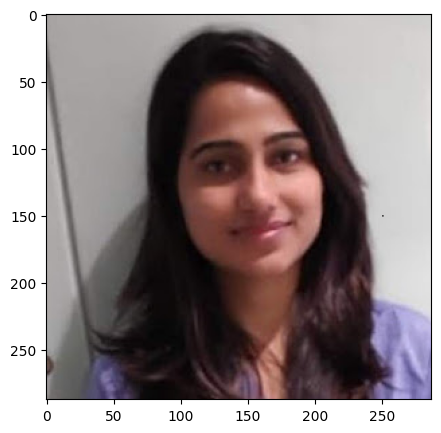

In [97]:
#photo_data = misc.imread('./passport-photo.jpg')
photo_data[150, 250] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing Colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

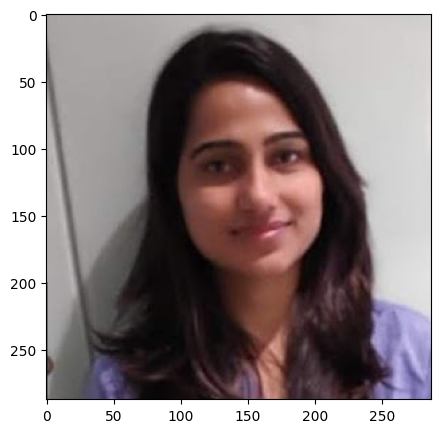

In [115]:
photo_data = imageio.v2.imread('./passport-photo.jpg')

photo_data[200:287, : 1] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

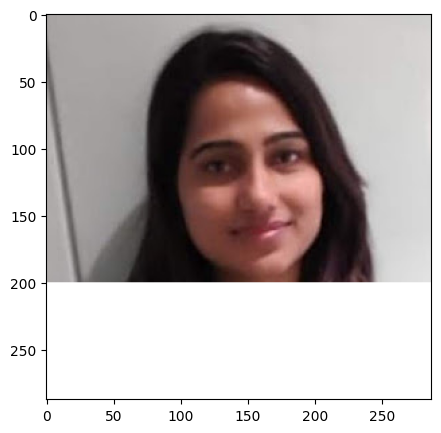

In [109]:
photo_data = imageio.v2.imread('./passport-photo.jpg')

photo_data[200:800, :] = 255
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

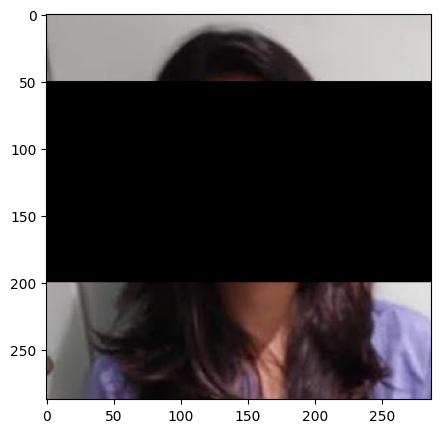

In [121]:
photo_data = imageio.v2.imread('./passport-photo.jpg')

photo_data[50:200,:] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [133]:
photo_data = imageio.v2.imread('./passport-photo.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 50
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (287, 287, 3)
Shape of low_value_filter: (287, 287, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

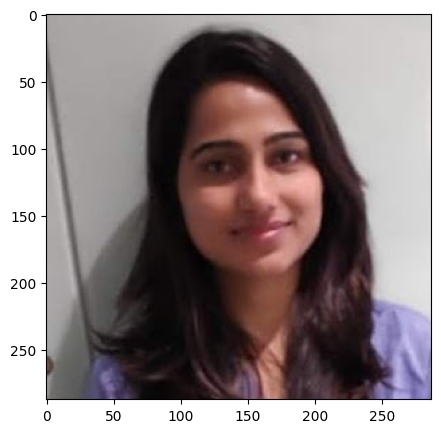

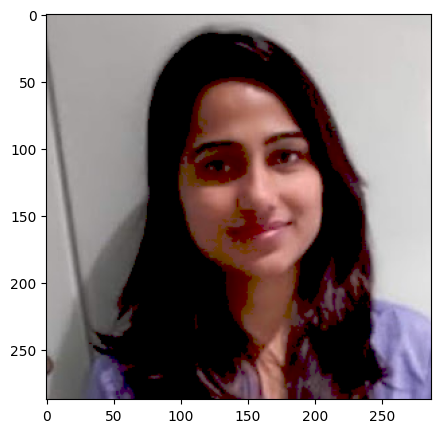

In [134]:
# import random
plt.figure(figsize=(10,5))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [135]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [136]:
rows_range

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [137]:
photo_data[rows_range, cols_range] = 255

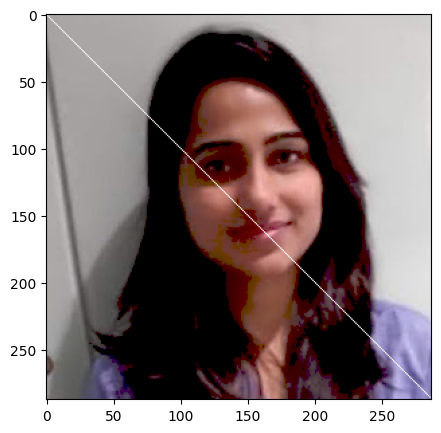

In [138]:
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Now let us try something even cooler...a mask that is in shape of a circular disc.

<img src="./1494532821.png" align="left" style="width:550px;height:360px;"/>

In [139]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (287, 287, 3)
X =  (287, 1)  and Y =  (1, 287)


In [140]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
print(X - center_row)
print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

center_row =  143.5 AND center_col =  143.5
[[-143.5]
 [-142.5]
 [-141.5]
 [-140.5]
 [-139.5]
 [-138.5]
 [-137.5]
 [-136.5]
 [-135.5]
 [-134.5]
 [-133.5]
 [-132.5]
 [-131.5]
 [-130.5]
 [-129.5]
 [-128.5]
 [-127.5]
 [-126.5]
 [-125.5]
 [-124.5]
 [-123.5]
 [-122.5]
 [-121.5]
 [-120.5]
 [-119.5]
 [-118.5]
 [-117.5]
 [-116.5]
 [-115.5]
 [-114.5]
 [-113.5]
 [-112.5]
 [-111.5]
 [-110.5]
 [-109.5]
 [-108.5]
 [-107.5]
 [-106.5]
 [-105.5]
 [-104.5]
 [-103.5]
 [-102.5]
 [-101.5]
 [-100.5]
 [ -99.5]
 [ -98.5]
 [ -97.5]
 [ -96.5]
 [ -95.5]
 [ -94.5]
 [ -93.5]
 [ -92.5]
 [ -91.5]
 [ -90.5]
 [ -89.5]
 [ -88.5]
 [ -87.5]
 [ -86.5]
 [ -85.5]
 [ -84.5]
 [ -83.5]
 [ -82.5]
 [ -81.5]
 [ -80.5]
 [ -79.5]
 [ -78.5]
 [ -77.5]
 [ -76.5]
 [ -75.5]
 [ -74.5]
 [ -73.5]
 [ -72.5]
 [ -71.5]
 [ -70.5]
 [ -69.5]
 [ -68.5]
 [ -67.5]
 [ -66.5]
 [ -65.5]
 [ -64.5]
 [ -63.5]
 [ -62.5]
 [ -61.5]
 [ -60.5]
 [ -59.5]
 [ -58.5]
 [ -57.5]
 [ -56.5]
 [ -55.5]
 [ -54.5]
 [ -53.5]
 [ -52.5]
 [ -51.5]
 [ -50.5]
 [ -49.5]
 [ -48

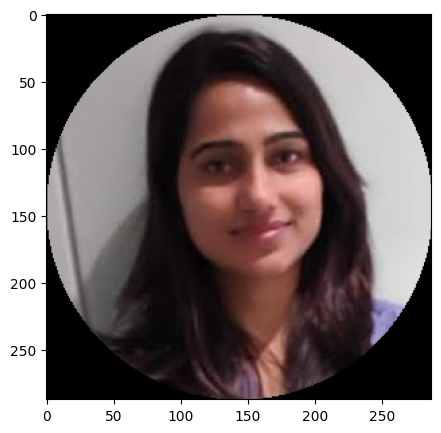

In [143]:
photo_data = imageio.v2.imread('./passport-photo.jpg')
photo_data[circular_mask] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Further Masking</p>
<br/>You can further improve the mask. For example, just get the upper half of the disc.

In [50]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

In [149]:
photo_data = imageio.v2.imread('./passport-photo.jpg')
photo_data[half_upper_mask] = 143
photo_data[half_upper_mask] = random.randint(200,200)
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 287 but corresponding boolean dimension is 3725

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing of our Satellite Imagery </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

/tmp/ipykernel_219654/2086658817.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  photo_data = imageio.imread('./sd-3layers.jpg')


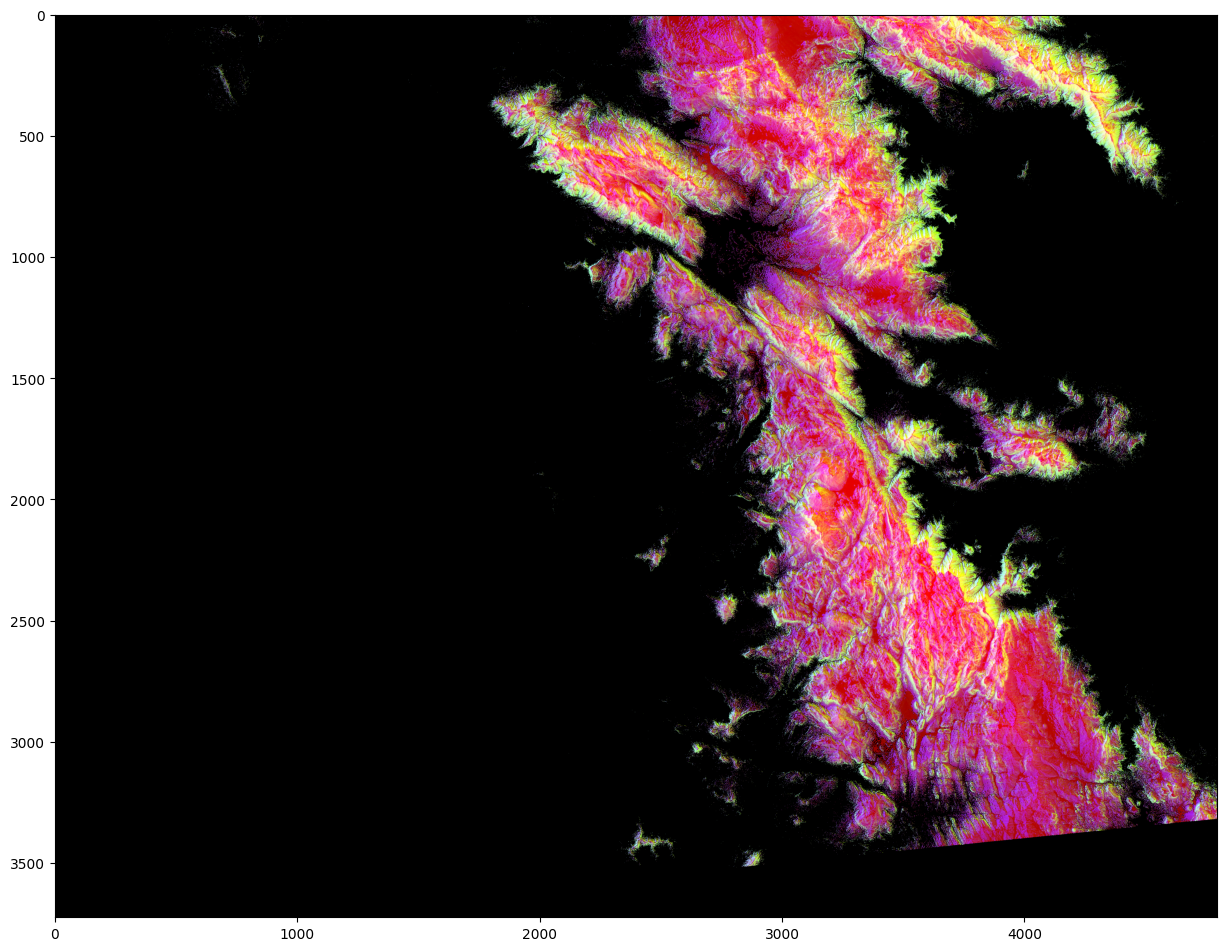

In [54]:
photo_data = imageio.imread('./sd-3layers.jpg')
red_mask   = photo_data[:, : ,0] < 150

photo_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-GREEN Pixels</p>

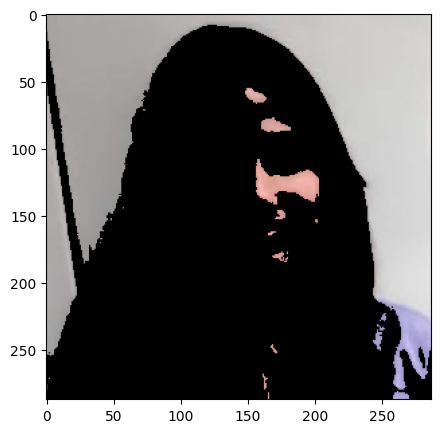

In [153]:
photo_data = imageio.v2.imread('./passport-photo.jpg')
green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-BLUE Pixels</p>

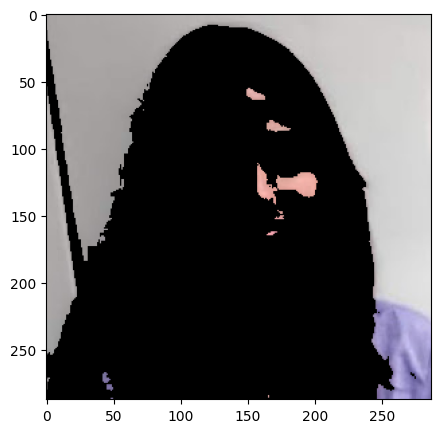

In [155]:
photo_data = imageio.v2.imread('./passport-photo.jpg')
blue_mask  = photo_data[:, : ,2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

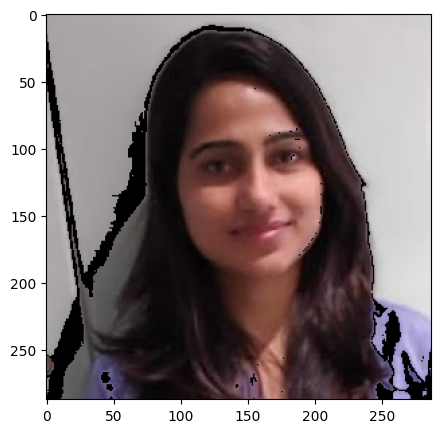

In [158]:
photo_data = imageio.v2.imread('./passport-photo.jpg')

red_mask   = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(10,5))
plt.imshow(photo_data)